In [1]:
# libraries
import pickle
import numpy as np


# global variables
file_destination = '10ktweetsjan2020.jsonl'
tweets = []
favourites_count = []
friends_count = []
followers_count = []
verified_count = []
retweet_status_counts = []
image_tweets = []
verified_user_tweet_len = 0
nonverified_user_tweet_len = 0

In [2]:
with (open(file_destination, "rb")) as openfile:  # opening file
    tweets.append(pickle.load(openfile))  # loading file
    tweets = tweets[0]  # reducing from a list of lists to lists


In [3]:
for tweet in tweets:  
    favourites_count.append(tweet['user']['favourites_count'])
    friends_count.append(tweet['user']['friends_count'])
    followers_count.append(tweet['user']['followers_count'])
    verified_count.append(tweet['user']['verified'])
    retweet_status_counts.append(tweet['retweet_count'])
    image_tweets.append(tweet['user']['entities'])
    # print(tweet['retweet_count'])

    if tweet['user']['verified']:
        verified_user_tweet_len += len(tweet['full_text'])
    else:
        nonverified_user_tweet_len += len(tweet['full_text'])

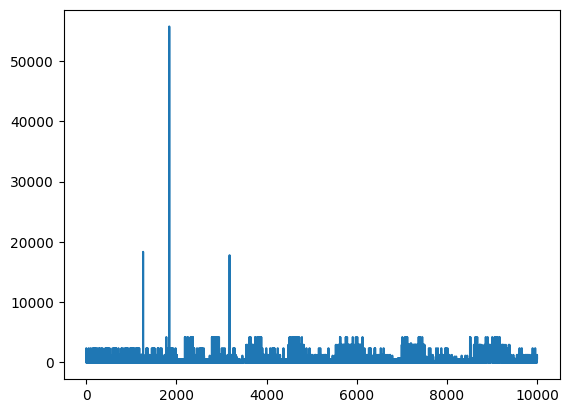

In [13]:
from matplotlib import pyplot as plt
plt.plot(retweet_status_counts)
plt.show()

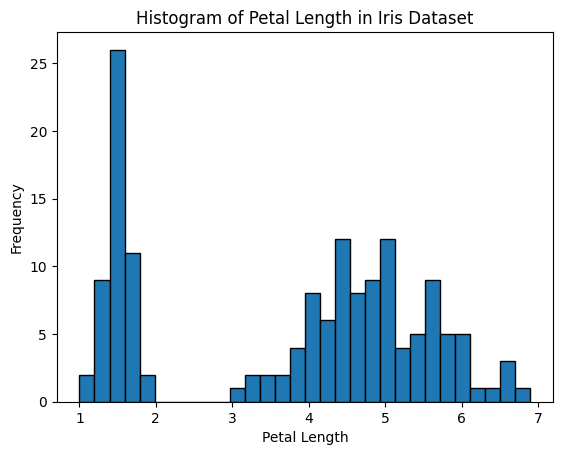

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
plt.hist(data['petal length'], bins=30, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length in Iris Dataset')
plt.show()

In [18]:
#Most popuplar tweets
from datetime import datetime
import re

created_at = []
for tweet in tweets: 
    if tweet['retweet_count'] > 4000:
        print(tweet['retweeted_status']['user']['name'], tweet['retweeted_status']['user']['followers_count'])
        print(tweet['full_text'])
        new_datetime = datetime.strftime(datetime.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
        created_at.append(new_datetime)
        print(new_datetime)

        

doinitwaybig_ 1736
RT @berttoJRR: THIS IS UNITY. SISTERS LIL KIM, MISSY, DA BRAT https://t.co/xXVRsK34vM
2020-01-22 05:02:25
World Health Organization (WHO) 8086988
RT @WHO: BREAKING: WHO Director-General @DrTedros will convene an Emergency Committee on the novel #coronavirus (2019-nCoV) under the Inter…
2020-01-22 08:45:49
World Health Organization (WHO) 8086988
RT @WHO: BREAKING: WHO Director-General @DrTedros will convene an Emergency Committee on the novel #coronavirus (2019-nCoV) under the Inter…
2020-01-22 08:54:41
BlackCultureEntertainment🗣 145924
RT @ILoveMyCulture: TURN IT OFF 😂😂😂😂 https://t.co/fkDnis9wiz
2020-01-22 09:45:43
World Health Organization (WHO) 8086989
RT @WHO: BREAKING: WHO Director-General @DrTedros will convene an Emergency Committee on the novel #coronavirus (2019-nCoV) under the Inter…
2020-01-22 09:58:04
World Health Organization (WHO) 8086989
RT @WHO: BREAKING: WHO Director-General @DrTedros will convene an Emergency Committee on the novel #coronavirus (2019

In [97]:
#Average of the tweets that are not tweeted once
tweet_counts = {}

for tweet in tweets:
    tweet_text = tweet["full_text"]
    if tweet_text in tweet_counts:
        tweet_counts[tweet_text] += 1
    else:
        tweet_counts[tweet_text] = 1

total_tweets = len(tweets)
total_unique_tweets = len(tweet_counts)
average_same_tweets = (total_tweets - total_unique_tweets)/ total_tweets
print(f"Total number of Tweets: {total_tweets}")
print(f"Total number of unique Tweets: {total_unique_tweets}")
print(f"Average number of tweets which are common texts: {average_same_tweets:.2f}")

Total number of Tweets: 9999
Total number of unique Tweets: 3740
Average number of tweets which are common texts: 0.63


In [17]:
#Count the number of verified and non verified account 
verified_user_tweet_len = 0
nonverified_user_tweet_len = 0

for tweet in tweets:
    if tweet.get('user', {}).get('verified', True):
        verified_user_tweet_len += 1
    else:
        nonverified_user_tweet_len += 1

print("Number of tweets from verified accounts:", verified_user_tweet_len)
print("Number of tweets from non-verified accounts:", nonverified_user_tweet_len)

Number of tweets from verified accounts: 529
Number of tweets from non-verified accounts: 9470


In [20]:
#Average fovourite counts on the verified accounts
total_favorites_verified = sum(tweet["user"]["favourites_count"] for tweet in tweets if tweet["user"]["verified"])

print("Total favorites count of verified users:", total_favorites_verified)

average = total_favorites_verified / verified_user_tweet_len
print("Average of likes in verified accounts ", average)


Total favorites count of verified users: 6645481
Average of likes in verified accounts  12562.345935727788


In [ ]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual data)
verified_favorites = [500, 600, 700, 800, 900]
nonverified_favorites = [300, 400, 350, 420, 380]

# Calculate the average favorite counts for verified and non-verified accounts
average_verified_favorites = sum(verified_favorites) / len(verified_favorites)
average_nonverified_favorites = sum(nonverified_favorites) / len(nonverified_favorites)

# Create a bar plot to compare average favorite counts
categories = ['Verified', 'Non-Verified']
average_favorites = [average_verified_favorites, average_nonverified_favorites]

plt.bar(categories, average_favorites, color=['blue', 'green'])
plt.ylabel('Average Favorite Count')
plt.title('Comparison of Average Favorite Counts (Verified vs. Non-Verified)')

plt.show()


In [34]:
#hashtags used in the tweets which have retweeted more than 1000 times
import re
hashtags_used = []

for tweet in tweets: 
    if tweet['retweet_count'] > 1000:
            tweet_text = tweet['full_text']
            hashtags = re.findall(r'#\w+', tweet_text)  
            print("Hashtags used:", hashtags)
            hashtags_used.extend(hashtags)
        


Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: []
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: ['#coronavirus', '#2019']
Hashtags used: []
Hashtags used: []
Hashtags u

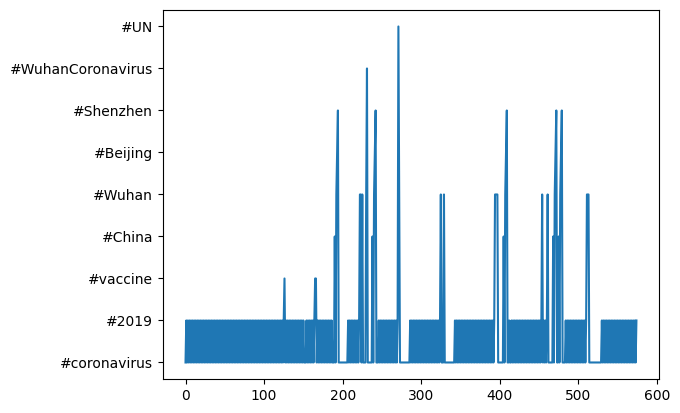

In [38]:
#Plot Graph which shows the tweets which has hashtag (other than coronavirus and 2019) used in it
from matplotlib import pyplot as plt
plt.plot(hashtags_used)
plt.show()

In [54]:
#how many tweets has used the hashtags such as coronavirus and vaccine
hashtags_to_track = ["coronavirus", "2019"]
hashtags_retweet_count = {hashtag: {"count": 0, "retweet_total": 0} for hashtag in hashtags_to_track}

for tweet in tweets:
    tweet_text = tweet["full_text"]
    retweet_count = tweet["retweet_count"]
    
    for hashtag in hashtags_to_track:
        if f"#{hashtag}" in tweet_text:
            hashtags_retweet_count[hashtag]["count"] += 1
            hashtags_retweet_count[hashtag]["retweet_total"] += retweet_count

for hashtag, data in hashtags_retweet_count.items():
    print(f"Hashtag: {hashtag}")
    print(f"Number of tweets with this hashtag: {data['count']}")
    print(f"Total retweet count for tweets with this hashtag: {data['retweet_total']}")
    print()

Hashtag: coronavirus
Number of tweets with this hashtag: 1758
Total retweet count for tweets with this hashtag: 1327530

Hashtag: 2019
Number of tweets with this hashtag: 298
Total retweet count for tweets with this hashtag: 282186



In [20]:
#@mentioned in the tweets which have retweeted more than 1000 times
created_at = []
mentions_used = []

for tweet in tweets: 
    if tweet['retweet_count'] > 1000:
        tweet_text = tweet['full_text']
        mentions = re.findall(r'@\w+', tweet_text)  
        print("Mentions used:", mentions)
        mentions_used.extend(mentions)

Mentions used: ['@CDCgov']
Mentions used: ['@nytimes']
Mentions used: ['@CDCgov']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@nytimes']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@CDCgov']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@nytimes']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@MatthewHilk', '@CNN', '@cnnhealth']
Mentions used: ['@CDCgov']
Mentions used: ['@nytimes']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@CDCgov']
Mentions used: ['@nytimes']
Mentions used: ['@CDCgo

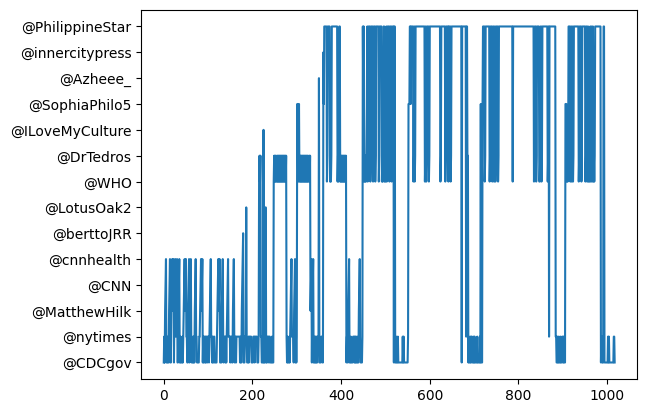

In [22]:
#Plot Graph which shows the tweets which has distinct @ used in tweets
from matplotlib import pyplot as plt
plt.plot(mentions_used)
plt.show()

In [25]:
#how many @ are used by verfied or non verfied accounts
verified_users_with_mentions = 0
nonverified_users_with_mentions = 0

for tweet in tweets:
    tweet_text = tweet['full_text']
    if "@" in tweet_text:
        if tweet['user']['verified']:
            verified_users_with_mentions += 1
        else:
            nonverified_users_with_mentions += 1

print("Verified users with mentions (@) in their tweets:", verified_users_with_mentions)
print("Non-verified users with mentions (@) in their tweets:", nonverified_users_with_mentions)


Verified users with mentions (@) in their tweets: 356
Non-verified users with mentions (@) in their tweets: 8247


In [29]:
#Common @ used by verified and non verified users
verified_user_mentions = set()
nonverified_user_mentions = set()

for tweet in tweets:
    tweet_text = tweet['full_text']
    mentions = re.findall(r'@\w+', tweet_text)
    if mentions:
        if tweet['user']['verified']:
            verified_user_mentions.update(mentions)
        else:
            nonverified_user_mentions.update(mentions)

common_mentions = verified_user_mentions.intersection(nonverified_user_mentions)
num_common_mentions = len(common_mentions)

print("Number of common @ mentions used by both verified and non-verified users:", num_common_mentions)
print("Common @ mentions used by both verified and non-verified users:")
for mention in common_mentions:
    print(mention)

Number of common @ mentions used by both verified and non-verified users: 171
Common @ mentions used by both verified and non-verified users:
@NewDay
@HHSGov
@PetesWire
@CDCemergency
@CDC_HIVAIDS
@Ecowas_cdc
@FOX
@cnnbrk
@nicolamlow
@goldencaskcap
@3onyourside
@klustout
@pahowho
@voxdotcom
@PMOIndia
@CDCgov
@MicrobesInfect
@CPHO_Canada
@haritho
@CDC_HIV
@CBCMorningLive
@WHO
@Lingling_Wei
@juliaoftoronto
@WHOEMRO
@StandNewsHK
@onlyyoontv
@cgtnam
@PDChina
@MMFill
@CDCtravel
@DrMattBinnicker
@JD_Corporate
@445am
@DrNancyM_CDC
@DrJAshton
@HelenBranswell
@ncbtweets
@CDC_DRH
@SocBirthDefects
@CNBC
@CBSNews
@NYTimes
@RodneyRohde
@realDonaldTrump
@EGPAF
@JTreece406
@CDCEnvironment
@CDCGov
@greg_folkers
@hkumed
@niccijsmith
@alvinllum
@WHOAFRO
@akbarnasirkhan
@ECDC_EU
@zerohedge
@PAHealthDept
@CNBCnow
@SandraSmithFox
@statnews
@jeromyu
@Even_Pay
@DrFrieden
@Kyle_Feldscher
@XHNews
@TheNETEC
@SarahMngsh
@WHO_Europe
@FINDdx
@CDCChronic
@Monicadisaster1
@MeyerBjoern
@PhilippineStar
@businessinsider

In [31]:
#Number of tweets having only texts and text+image
text_only_tweets = 0
text_and_image_tweets = 0

for tweet in tweets:
    tweet_text = tweet['full_text']
    has_media = 'media' in tweet['entities']
    
    if has_media:
        text_and_image_tweets += 1
    else:
        text_only_tweets += 1

print("Number of tweets with only text:", text_only_tweets)
print("Number of tweets with text and images:", text_and_image_tweets)

Number of tweets with only text: 9419
Number of tweets with text and images: 580
